![Cabec%CC%A7alho_notebook.png](cabecalho_notebook.png)

# Classificação de Atividade Humana com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [63]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

folder = r"Dados\UCI"

features_file = os.path.join(folder, "features.txt")
labels_file = os.path.join(folder, "activity_labels.txt")

subjtrain_file = os.path.join(folder, "subject_train.txt")
xtrain_file = os.path.join(folder, "X_train.txt")
ytrain_file = os.path.join(folder, "y_train.txt")

subjtest_file = os.path.join(folder, "subject_test.txt")
xtest_file = os.path.join(folder, "X_test.txt")
ytest_file = os.path.join(folder, "y_test.txt")

# Carregando a base features.txt em uma Series
features = pd.read_csv(features_file, header=None, names=['nome_var'], sep="#")
labels = pd.read_csv(labels_file, delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(subjtrain_file, header=None, names=['subject_id'])
X_train = pd.read_csv(xtrain_file, delim_whitespace=True, header=None, names=features['nome_var'].tolist())

subject_test = pd.read_csv(subjtest_file, header=None, names=['subject_id'])
X_test = pd.read_csv(xtest_file, delim_whitespace=True, header=None, names=features['nome_var'].tolist())
y_test = pd.read_csv(ytest_file, header=None, names=['cod_label'])

## PCA com variáveis padronizadas

Reflexão sobre a escala das variáveis:

**Variáveis em métricas muito diferentes** podem interferir na análise de componentes principais. Lembra que variância é informação pra nós? Pois bem, tipicamente se há uma variável monetária como salário, vai ter uma ordem de variabilidade bem maior que número de filhos, tempo de emprego ou qualquer variável dummy. Assim, as variáveis de maior variância tendem a "dominar" a análise. Nesses casos é comum usar a padronização das variáveis.

Faça duas análises de componentes principais para a base do HAR - com e sem padronização e compare:

- A variância explicada por componente
- A variância explicada acumulada por componente
- A variância percentual por componente
- A variância percentual acumulada por componente
- Quantas componentes você escolheria, em cada caso para explicar 90% da variância?

Analise com padronização

In [64]:
%%time

def padroniza(s):
    if s.std() > 0:
        s = (s - s.mean())/s.std()
    return s

X_train_pad = pd.DataFrame(X_train).apply(padroniza, axis=0)

CPU times: total: 359 ms
Wall time: 416 ms


     Componente  Variância Explicada  Variância Acumulada  \
0             1         2.848824e+02           284.882377   
1             2         3.691762e+01           321.799993   
2             3         1.574411e+01           337.544103   
3             4         1.404717e+01           351.591278   
4             5         1.059328e+01           362.184557   
..          ...                  ...                  ...   
556         557         1.822707e-30           561.000000   
557         558         1.822707e-30           561.000000   
558         559         1.822707e-30           561.000000   
559         560         1.598993e-32           561.000000   
560         561         2.351208e-33           561.000000   

     Variância Percentual  Variância Percentual Acumulada  
0            5.078117e-01                        0.507812  
1            6.580680e-02                        0.573619  
2            2.806437e-02                        0.601683  
3            2.503953e-02  

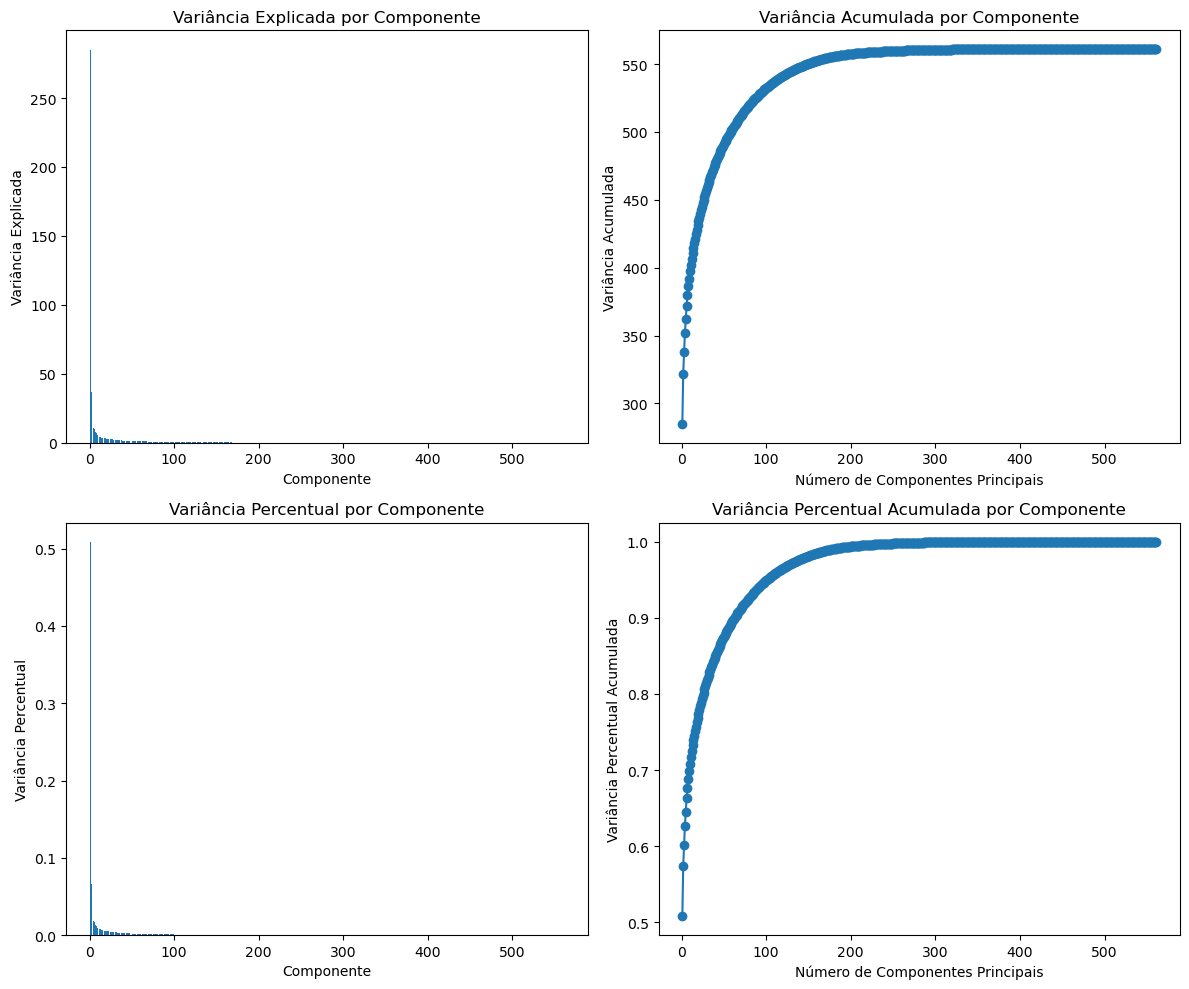

In [65]:
# Modelo PCA com padronização
pca_pad = PCA()
componentes_principais_pad = pca_pad.fit_transform(X_train_pad)

# Variância explicada por componente
variancia_explicada_pad = pca_pad.explained_variance_

# Variância explicada acumulada por componente
variancia_acumulada_pad = np.cumsum(variancia_explicada_pad)

# Variância percentual por componente
variancia_percentual_pad = pca_pad.explained_variance_ratio_

# Variância percentual acumulada por componente
variancia_percentual_acumulada_pad = np.cumsum(variancia_percentual_pad)

# Criação de um DataFrame para facilitar a visualização
df_resultados_pad = pd.DataFrame({
    'Componente': range(1, len(variancia_explicada_pad) + 1),
    'Variância Explicada': variancia_explicada_pad,
    'Variância Acumulada': variancia_acumulada_pad,
    'Variância Percentual': variancia_percentual_pad,
    'Variância Percentual Acumulada': variancia_percentual_acumulada_pad
})

print(df_resultados_pad)

# Criação de subplots para todos os gráficos
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Gráfico da Variância Explicada por Componente
axs[0, 0].bar(range(1, len(variancia_explicada_pad) + 1), variancia_explicada_pad)
axs[0, 0].set_title('Variância Explicada por Componente')
axs[0, 0].set_xlabel('Componente')
axs[0, 0].set_ylabel('Variância Explicada')

# Gráfico da Variância Acumulada por Componente
axs[0, 1].plot(range(1, len(variancia_acumulada_pad) + 1), variancia_acumulada_pad, marker='o')
axs[0, 1].set_title('Variância Acumulada por Componente')
axs[0, 1].set_xlabel('Número de Componentes Principais')
axs[0, 1].set_ylabel('Variância Acumulada')

# Gráfico da Variância Percentual por Componente
axs[1, 0].bar(range(1, len(variancia_percentual_pad) + 1), variancia_percentual_pad)
axs[1, 0].set_title('Variância Percentual por Componente')
axs[1, 0].set_xlabel('Componente')
axs[1, 0].set_ylabel('Variância Percentual')

# Gráfico da Variância Percentual Acumulada por Componente
axs[1, 1].plot(range(1, len(variancia_percentual_acumulada_pad) + 1), variancia_percentual_acumulada_pad, marker='o')
axs[1, 1].set_title('Variância Percentual Acumulada por Componente')
axs[1, 1].set_xlabel('Número de Componentes Principais')
axs[1, 1].set_ylabel('Variância Percentual Acumulada')

# Ajusta o layout
plt.tight_layout()

# Exibe os gráficos
plt.show()

Analise sem padronização

     Componente  Variância Explicada  Variância Acumulada  \
0             1         3.482363e+01            34.823630   
1             2         2.735046e+00            37.558677   
2             3         2.294393e+00            39.853070   
3             4         1.043775e+00            40.896845   
4             5         9.435170e-01            41.840362   
..          ...                  ...                  ...   
556         557         6.753747e-33            55.669318   
557         558         9.066963e-34            55.669318   
558         559         8.838663e-34            55.669318   
559         560         1.993432e-34            55.669318   
560         561         4.074791e-35            55.669318   

     Variância Percentual  Variância Percentual Acumulada  
0            6.255444e-01                        0.625544  
1            4.913023e-02                        0.674675  
2            4.121467e-02                        0.715889  
3            1.874956e-02  

Text(0, 0.5, 'Variância Percentual Acumulada')

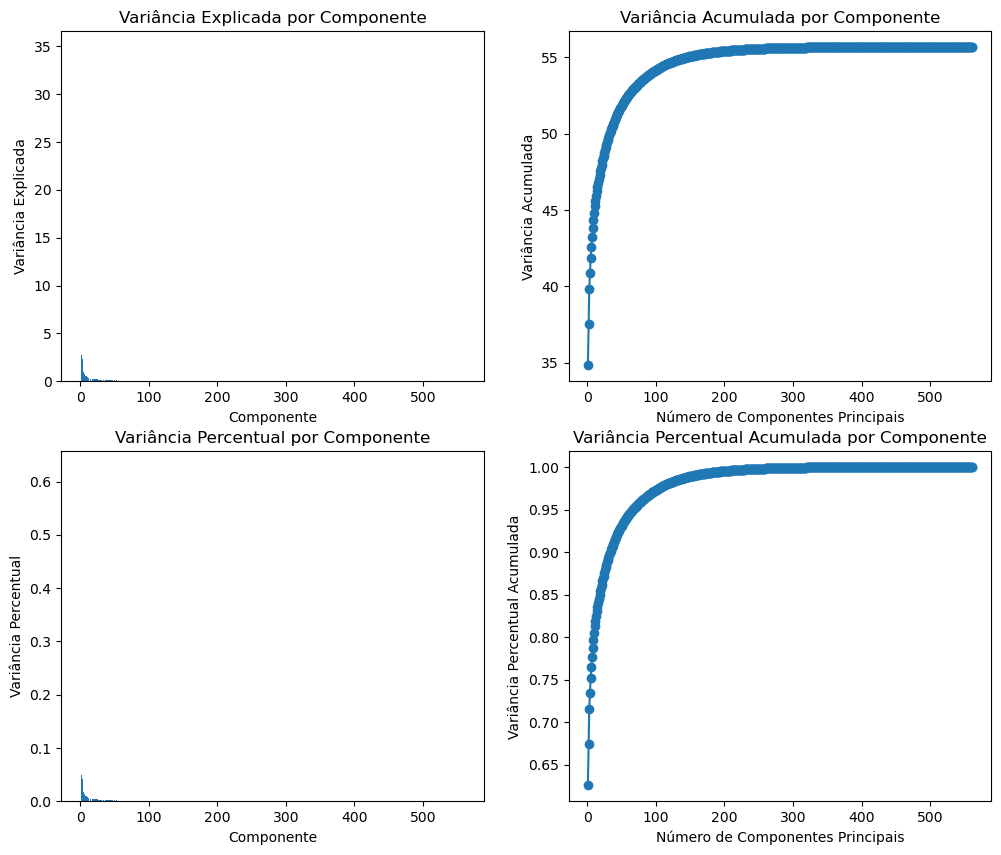

In [66]:
# Modelo PCA sem padronização
pca = PCA()
componentes_principais = pca_pad.fit_transform(X_train)

# Variância explicada por componente
variancia_explicada = pca_pad.explained_variance_

# Variância explicada acumulada por componente
variancia_acumulada = np.cumsum(variancia_explicada)

# Variância percentual por componente
variancia_percentual = pca_pad.explained_variance_ratio_

# Variância percentual acumulada por componente
variancia_percentual_acumulada = np.cumsum(variancia_percentual)

# Criação de um DataFrame para facilitar a visualização
df_resultados = pd.DataFrame({
    'Componente': range(1, len(variancia_explicada) + 1),
    'Variância Explicada': variancia_explicada,
    'Variância Acumulada': variancia_acumulada,
    'Variância Percentual': variancia_percentual,
    'Variância Percentual Acumulada': variancia_percentual_acumulada
})

print(df_resultados)

# Criação de subplots para todos os gráficos
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Gráfico da Variância Explicada por Componente
axs[0, 0].bar(range(1, len(variancia_explicada) + 1), variancia_explicada)
axs[0, 0].set_title('Variância Explicada por Componente')
axs[0, 0].set_xlabel('Componente')
axs[0, 0].set_ylabel('Variância Explicada')

# Gráfico da Variância Acumulada por Componente
axs[0, 1].plot(range(1, len(variancia_acumulada) + 1), variancia_acumulada, marker='o')
axs[0, 1].set_title('Variância Acumulada por Componente')
axs[0, 1].set_xlabel('Número de Componentes Principais')
axs[0, 1].set_ylabel('Variância Acumulada')

# Gráfico da Variância Percentual por Componente
axs[1, 0].bar(range(1, len(variancia_percentual) + 1), variancia_percentual)
axs[1, 0].set_title('Variância Percentual por Componente')
axs[1, 0].set_xlabel('Componente')
axs[1, 0].set_ylabel('Variância Percentual')

# Gráfico da Variância Percentual Acumulada por Componente
axs[1, 1].plot(range(1, len(variancia_percentual_acumulada) + 1), variancia_percentual_acumulada, marker='o')
axs[1, 1].set_title('Variância Percentual Acumulada por Componente')
axs[1, 1].set_xlabel('Número de Componentes Principais')
axs[1, 1].set_ylabel('Variância Percentual Acumulada')

Quantas componentes você escolheria, em cada caso para explicar 90% da variância?

Caso padronizado

In [67]:
# Devido a quantidade de variaveis presentes, ficou mais simples criar um algoritmo matematico visando determinar o número de componentes em cada caso 
# Componentes para explicar 90% da variância explicada
n_componentes_explicada_pad = np.argmax(np.cumsum(variancia_explicada_pad) >= 0.90) + 1

# Componentes para explicar 90% da variância percentual acumulada
n_componentes_percentual_pad = np.argmax(variancia_percentual_acumulada_pad >= 0.90) + 1

print(f'Número de componentes para explicar 90% da variância explicada: {n_componentes_explicada_pad}')
print(f'Número de componentes para explicar 90% da variância percentual acumulada: {n_componentes_percentual_pad}')

Número de componentes para explicar 90% da variância explicada: 1
Número de componentes para explicar 90% da variância percentual acumulada: 63


Caso sem padronização

In [68]:
# Devido a quantidade de variaveis presentes, ficou mais simples criar um algoritmo matematico visando determinar o número de componentes em cada caso 
# Componentes para explicar 90% da variância explicada
n_componentes_explicada = np.argmax(np.cumsum(variancia_explicada) >= 0.90) + 1

# Componentes para explicar 90% da variância percentual acumulada
n_componentes_percentual = np.argmax(variancia_percentual_acumulada >= 0.90) + 1

print(f'Número de componentes para explicar 90% da variância explicada: {n_componentes_explicada}')
print(f'Número de componentes para explicar 90% da variância percentual acumulada: {n_componentes_percentual}')

Número de componentes para explicar 90% da variância explicada: 1
Número de componentes para explicar 90% da variância percentual acumulada: 34


## Árvore com PCA

Faça duas uma árvore de decisão com 10 componentes principais - uma com base em dados padronizados e outra sem padronizar. Utilize o ```ccp_alpha=0.001```.

Compare a acurácia na base de treino e teste.

In [69]:
y_train = pd.read_csv(ytrain_file, header=None, names=['cod_label'])

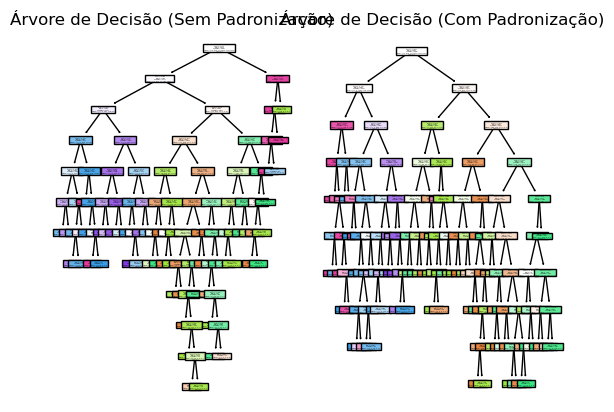

CPU times: total: 8.33 s
Wall time: 11.4 s


In [70]:
%%time

# Divisão dos dados sem padronização
X_train_no_pad, X_test_no_pad, y_train_no_pad, y_test_no_pad = train_test_split(
    componentes_principais[:, :10], y_train, test_size=0.2, random_state=42)

# Divisão dos dados com padronização
X_train_pad, X_test_pad, y_train_pad, y_test_pad = train_test_split(
    componentes_principais_pad[:, :10], y_train, test_size=0.2, random_state=42)

# Criação das árvores de decisão
tree_no_pad = DecisionTreeClassifier(ccp_alpha=0.001, random_state=42)
tree_pad = DecisionTreeClassifier(ccp_alpha=0.001, random_state=42)

# Treinamento das árvores sem padronização
tree_no_pad.fit(X_train_no_pad, y_train_no_pad)

# Treinamento das árvores com padronização
tree_pad.fit(X_train_pad, y_train_pad)

# Árvore sem padronização
plt.subplot(1, 2, 1)
plot_tree(tree_no_pad, filled=True, feature_names=[f'PC{i}' for i in range(1, 11)], class_names=[str(label) for label in tree_no_pad.classes_])
plt.title('Árvore de Decisão (Sem Padronização)')

# Árvore com padronização
plt.subplot(1, 2, 2)
plot_tree(tree_pad, filled=True, feature_names=[f'PC{i}' for i in range(1, 11)], class_names=[str(label) for label in tree_pad.classes_])
plt.title('Árvore de Decisão (Com Padronização)')

plt.show()

Comparando as acurácias dos modelos

In [81]:
# Para obter as acurácias é necessário realizar as predições em cada um dos casos estudados

# Predições na base de treinamento
y_train_pred_no_pad = tree_no_pad.predict(X_test_no_pad)
y_train_pred_pad = tree_pad.predict(X_test_pad)

# Predições na base de teste
y_test_pred_no_pad = tree_no_pad.predict(X_test_no_pad)
y_test_pred_pad = tree_pad.predict(X_test_pad)

# Acurácia na base de treinamento
acuracia_train_no_pad = accuracy_score(y_test_pred_no_pad, y_train_pred_no_pad)
acuracia_train_pad = accuracy_score(y_test_pad, y_train_pred_pad)

# Acuracia na base de teste
acuracia_test_no_pad = accuracy_score(y_test_no_pad, y_test_pred_no_pad)
acuracia_test_pad = accuracy_score(y_test_pad, y_test_pred_pad)

# Print das acuracias
print(f'Acuracia treinamento, sem padronização: {acuracia_train_no_pad*100:.2f}')
print(f'Acuracia treinamento, com padronização: {acuracia_train_pad*100:.2f}')
print(f'Acuracia teste, sem padronização: {acuracia_test_no_pad*100:.2f}')
print(f'Acuracia teste, com padronização: {acuracia_test_pad*100:.2f}')


Acuracia treinamento, sem padronização: 100.00
Acuracia treinamento, com padronização: 82.53
Acuracia teste, sem padronização: 86.34
Acuracia teste, com padronização: 82.53
